In [1]:
####### Example 2.6 starts here #######

In [2]:
import numpy as np

In [3]:
# 定义已知工程常数
E1 = 181.0*1.0E9; #Pa
E2 = 10.3*1.0E9; #Pa
v12 = 0.28;
G12 = 7.17*1.0E9; #Pa

In [4]:
# 根据工程常数计算柔度矩阵的系数
S11 = 1/E1;
S12 = -v12/E1;
S22 = 1/E2;
S66 = 1/G12;
# 打印计算结果
print("S11 =", S11, "Pa-1")
print("S12 =", S12, "Pa-1")
print("S22 =", S22, "Pa-1")
print("S66 =", S66, "Pa-1")

S11 = 5.524861878453039e-12 Pa-1
S12 = -1.546961325966851e-12 Pa-1
S22 = 9.70873786407767e-11 Pa-1
S66 = 1.394700139470014e-10 Pa-1


In [5]:
# 初始化柔度矩阵
S = np.zeros((3,3))
# 将柔度矩阵的非零元素依次赋值；注意Python的编码从0开始。
S[0][0] = S11;
S[0][1] = S12;
S[1][0] = S[0][1];
S[1][1] = S22;
S[2][2] = S66;
# 打印柔度矩阵
print("Compliance matrix = \n", S, "\n Unit: Pa-1")

Compliance matrix = 
 [[ 5.52486188e-12 -1.54696133e-12  0.00000000e+00]
 [-1.54696133e-12  9.70873786e-11  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.39470014e-10]] 
 Unit: Pa-1


In [6]:
# 计算次泊松比，并打印
v21 = v12/E1*E2;
print("v21 =",v21)

v21 = 0.015933701657458565


In [7]:
# 矩阵运算求解折减刚度矩阵
Q = np.linalg.inv(S)
print("Reduced stiffness matrix =\n", Q, "\n Unit: Pa")

Reduced stiffness matrix =
 [[1.81811139e+11 2.89692444e+09 0.00000000e+00]
 [2.89692444e+09 1.03461587e+10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.17000000e+09]] 
 Unit: Pa


In [8]:
# 定义已知应力分量
sigma1 = 2.0*1.0E6; #Pa
sigma2 = -3.0*1.0E6; #Pa
tau12 = 4.0*1.0e6; #Pa

In [9]:
# 定义应力、应变矢量
stress = np.zeros((3,1))
strain = np.zeros((3,1))
# 给应力矢量赋值
stress[0] = sigma1;
stress[1] = sigma2;
stress[2] = tau12;
# 矩阵运算求解应变矢量
strain = np.matmul(S, stress);
# 打印计算结果
print("strain = \n", strain)

strain = 
 [[ 1.56906077e-05]
 [-2.94356059e-04]
 [ 5.57880056e-04]]


In [10]:
####### Example 2.7 starts here #######

In [11]:
import math

In [12]:
# 计算转换矩阵 T
theta = 60/180*math.pi; # rad
c = np.cos(theta)
s = np.sin(theta)
T = np.zeros((3,3))
T[0][0] = c**2;
T[0][1] = s**2;
T[0][2] = 2.0*c*s;
T[1][0] = s**2;
T[1][1] = c**2;
T[1][2] = -2.0*c*s;
T[2][0] = -s*c;
T[2][1] = s*c;
T[2][2] = c**2-s**2;
# 打印转换矩阵 T
print("Transformation matrix =\n", T)

Transformation matrix =
 [[ 0.25       0.75       0.8660254]
 [ 0.75       0.25      -0.8660254]
 [-0.4330127  0.4330127 -0.5      ]]


In [13]:
# 定义R矩阵
R = np.zeros((3,3))
R[0][0] = 1;
R[1][1] = 1;
R[2][2] = 2;
# 打印R矩阵
print(R)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 2.]]


In [14]:
# 计算全局折减刚度矩阵
Q_bar = np.linalg.multi_dot([np.linalg.inv(T), Q, R, T, np.linalg.inv(R)])
# 打印全局折减刚度矩阵
print("Transfomed reduced stiffness matrix, Q_bar =\n", Q_bar, "\n Unit: Pa")

Transfomed reduced stiffness matrix, Q_bar =
 [[2.36467571e+10 3.24625711e+10 2.00535231e+10]
 [3.24625711e+10 1.09379247e+11 5.41929912e+10]
 [2.00535231e+10 5.41929912e+10 3.67356466e+10]] 
 Unit: Pa


In [15]:
# 计算全局柔度矩阵
S_bar = np.linalg.inv(Q_bar)
# 打印全局柔度矩阵
print("Transformed compliance matrix, S_bar =\n", S_bar, "\n Unit: Pa-1")

Transformed compliance matrix, S_bar =
 [[ 8.05274715e-11 -7.87768335e-12 -3.23376446e-11]
 [-7.87768335e-12  3.47462131e-11 -4.69578209e-11]
 [-3.23376446e-11 -4.69578209e-11  1.14147126e-10]] 
 Unit: Pa-1


In [16]:
# 定义全局坐标系应力分量  已知条件
sigma_x = 2.0*1.0E6; #Pa
sigma_y = -3.0*1.0E6; #Pa
tau_xy = 4.0*1.0e6; #Pa
# 全局坐标系应力矢量表达
stress_xyz = np.zeros((3,1))
stress_xyz[0] = sigma_x;
stress_xyz[1] = sigma_y;
stress_xyz[2] = tau_xy;
# 打印全局坐标系应力矢量
print("Global stresses, stress_xyz =\n", stress_xyz, "\n Unit: Pa")

Global stresses, stress_xyz =
 [[ 2000000.]
 [-3000000.]
 [ 4000000.]] 
 Unit: Pa


In [17]:
# 利用全局柔度矩阵S_bar计算全局坐标系应变分量
strain_xyz = np.linalg.multi_dot([S_bar, stress_xyz])
# 打印全局坐标系应变矢量
print("Global strains, strain_xyz =\n", strain_xyz)

Global strains, strain_xyz =
 [[ 5.53374144e-05]
 [-3.07825290e-04]
 [ 5.32786677e-04]]


In [18]:
# 利用转换矩阵T计算局部坐标系下的应力矢量
stress = np.linalg.multi_dot([T, stress_xyz])
# 打印局部坐标系下的应力矢量
print("Local stresses, stress =\n", stress, "\n Unit: Pa")

Local stresses, stress =
 [[ 1714101.61513776]
 [-2714101.61513776]
 [-4165063.5094611 ]] 
 Unit: Pa


In [19]:
# 利用材料柔度矩阵计算局部坐标系下的应变矢量
strain = np.linalg.multi_dot([S, stress])
# 打印局部坐标系下的应变矢量
print("Local strains, strain =\n", strain)

Local strains, strain =
 [[ 1.36687849e-05]
 [-2.66156660e-04]
 [-5.80901466e-04]]


In [20]:
####### Example 2.9 starts here ####### 

In [21]:
# 计算工程常数
Ex = 1.0 / (c**4/E1 + (1.0/G12-2.0*v12/E1)*s**2*c**2 + s**4/E2)
vxy = Ex * (v12/E1*(s**4+c**4) - (1.0/E1 + 1.0/E2 -1.0/G12)*s**2*c**2)
Ey = 1.0 / (s**4/E1 + (-2*v12/E1 + 1.0/G12)*s**2*c**2 + c**4/E2)
Gxy = 1.0 / (2.0*(2.0/E1+2.0/E2+4.0*v12/E1-1.0/G12)*s**2*c**2 + (s**4+c**4)/G12)
mx = E1 * ((-2.0/E1-2*v12/E1+1.0/G12)*s*c**3 + (2.0/E2+2.0*v12/E1-1.0/G12)*s**3*c)
my = E1 * ((-2.0/E1-2*v12/E1+1.0/G12)*s**3*c + (2.0/E2+2.0*v12/E1-1.0/G12)*s*c**3)
# 打印结果
print("Ex =", Ex, "vxy =", vxy, "Ey =", Ey, "Gxy =", Gxy, "mx =", mx, "my =", my)

Ex = 12418122433.712334 vxy = 0.09782603629006482 Ey = 28780114754.493576 Gxy = 8760623558.595837 mx = 5.853113681639095 my = 8.499365583021461


In [22]:
####### Drawing Figs. 2.24-2.29 #######

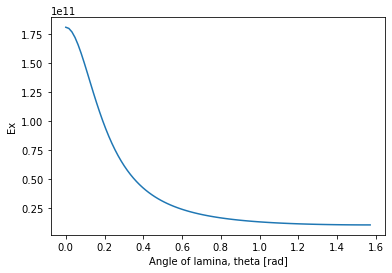

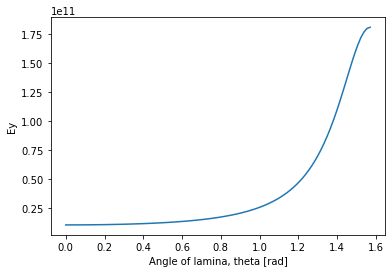

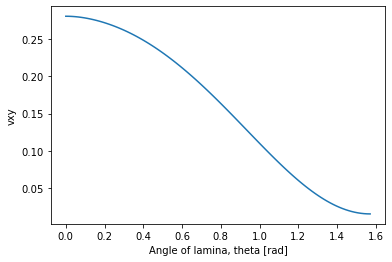

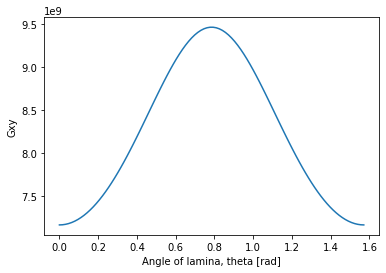

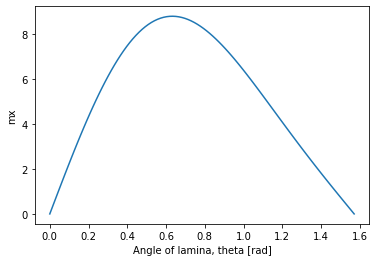

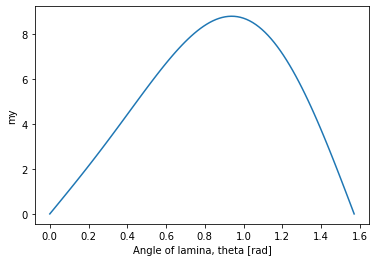

In [23]:
import matplotlib.pyplot as plt
theta = np.linspace(0, math.pi/2.0, 100)
c = np.cos(theta)
s = np.sin(theta)
Ex = 1.0 / (c**4/E1 + (1.0/G12-2.0*v12/E1)*s**2*c**2 + s**4/E2)
vxy = Ex * (v12/E1*(s**4+c**4) - (1.0/E1 + 1.0/E2 -1.0/G12)*s**2*c**2)
Ey = 1.0 / (s**4/E1 + (-2*v12/E1 + 1.0/G12)*s**2*c**2 + c**4/E2)
Gxy = 1.0 / (2.0*(2.0/E1+2.0/E2+4.0*v12/E1-1.0/G12)*s**2*c**2 + (s**4+c**4)/G12)
mx = E1 * ((-2.0/E1-2*v12/E1+1.0/G12)*s*c**3 + (2.0/E2+2.0*v12/E1-1.0/G12)*s**3*c)
my = E1 * ((-2.0/E1-2*v12/E1+1.0/G12)*s**3*c + (2.0/E2+2.0*v12/E1-1.0/G12)*s*c**3)
# 绘制曲线 纵坐标为Ex Ey vxy Gxy mx my，横坐标为铺层角度theta
plt.plot(theta, Ex)
plt.xlabel("Angle of lamina, theta [rad]")
plt.ylabel("Ex")
plt.show()
plt.plot(theta, Ey)
plt.xlabel("Angle of lamina, theta [rad]")
plt.ylabel("Ey")
plt.show()
plt.plot(theta, vxy)
plt.xlabel("Angle of lamina, theta [rad]")
plt.ylabel("vxy")
plt.show()
plt.plot(theta, Gxy)
plt.xlabel("Angle of lamina, theta [rad]")
plt.ylabel("Gxy")
plt.show()
plt.plot(theta, mx)
plt.xlabel("Angle of lamina, theta [rad]")
plt.ylabel("mx")
plt.show()
plt.plot(theta, my)
plt.xlabel("Angle of lamina, theta [rad]")
plt.ylabel("my")
plt.show()